# PROYECTO DE INTELIGENCIA ARTIFICIAL


## Por: Marco Castelo

### CREACIÓN DE UNA RED NEURONAL ARTIFICIAL PARA LA DETECCIÓN DE PACIENTES CON NEUMONIA MEDIANTE LA EVALUACIÓN DE RADIOGRAFÍAS DE TORAX

#### Importamos las librerías necesarias para crear nuestro modelo

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU  ##Librerías que necesitamos para crear nuestra red neuronal

#### Cargamos las imágenes en la memoria del computador

In [ ]:
dirname = os.path.join(os.getcwd(), 'NEUMONIA')## lugar de donde obtenemos las imágenes de las rediografías
imgpath = dirname + os.sep 
#procedemos a la lecura de las radiografías
images = []
directories = []
dircount = []
prevRoot=''
cant=0
print("leyendo imagenes de ",imgpath)
dirname = os.path.join(os.getcwd(), 'NEUMONIA') 
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant) 
dircount = dircount[1:]#obtenemos el número de imágenes que tiene cada directorio
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

#### Creamos las etiquetas

In [3]:
labels=[] #creamos las etiquetas
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  624


#### Creamos las clases y las guardamos en una lista

In [4]:
NEUMONIA=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    NEUMONIA.append(name[len(name)-1])
    indice=indice+1#en la lista NEUMONIA guardamos las clases etiquetadas

0 NORMAL
1 PNEUMONIA


In [5]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy


classes = np.unique(y)
nClasses = len(classes)
print('Número total de salidas : ', nClasses)
print('Tipos de salida : ', classes)

Número total de salidas :  2
Tipos de salida :  [0 1]


#### Dividimos los datos en entrenamiento y prueba

In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Datos de Entrenamiento: ', train_X.shape, train_Y.shape)
print('Datos de Prueba : ', test_X.shape, test_Y.shape)

Datos de Entrenamiento:  (499, 28, 28, 3) (499,)
Datos de Prueba :  (125, 28, 28, 3) (125,)


#### Mostramos una imagen de entrenamiento y una de prueba

Text(0.5, 1.0, 'Imágenes de prueba : 1')

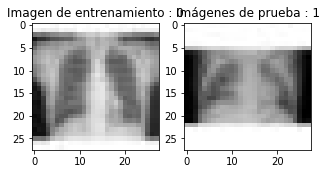

In [36]:
plt.figure(figsize=[5,5])

# Se muestra la primera imagen de los datos de entrenamiemto
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Imagen de entrenamiento : {}".format(train_Y[0]))

# Se muestra la primera imagen de los datos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Imágenes de prueba : {}".format(test_Y[0]))

#### Preparamos las variables para la construcción del modelo


In [39]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [40]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original :', train_Y[0])
print('despeués de la conversion to one-hot:', train_Y_one_hot[0])

Original : 0
despeues de la conversion to one-hot: [1. 0.]


In [10]:
#Mezclar todo y crear los grupos de entrenamiento y prueba
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [11]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(399, 28, 28, 3) (100, 28, 28, 3) (399, 2) (100, 2)


## Creación del modelo 

In [12]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de épocas de la red Neuronal 
batch_size = 64 # Tamaño de lote de imagenes en memoria

In [13]:
neumo_model = Sequential()
neumo_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
neumo_model.add(LeakyReLU(alpha=0.1))
neumo_model.add(MaxPooling2D((2, 2),padding='same'))
neumo_model.add(Dropout(0.5))
neumo_model.add(Flatten())
neumo_model.add(Dense(32, activation='linear'))
neumo_model.add(LeakyReLU(alpha=0.1))
neumo_model.add(Dropout(0.5))
neumo_model.add(Dense(nClasses, activation='softmax'))

In [14]:
neumo_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                200736    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)               

In [16]:
neumo_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [18]:
#Entrenamos el modelo, esto puede tardar varios minutos dependiendo de la velocidad de procesamiento del computador
neumo_train = neumo_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 399 samples, validate on 100 samples
Epoch 1/6
399/399 [==============================] - 1s 3ms/step - loss: 0.7860 - accuracy: 0.6266 - val_loss: 0.6313 - val_accuracy: 0.6300
Epoch 2/6
399/399 [==============================] - 0s 653us/step - loss: 0.6445 - accuracy: 0.6717 - val_loss: 0.6259 - val_accuracy: 0.7000
Epoch 3/6
399/399 [==============================] - 0s 489us/step - loss: 0.5983 - accuracy: 0.6942 - val_loss: 0.5982 - val_accuracy: 0.6800
Epoch 4/6
399/399 [==============================] - 0s 465us/step - loss: 0.5802 - accuracy: 0.6842 - val_loss: 0.6174 - val_accuracy: 0.6700
Epoch 5/6
399/399 [==============================] - 0s 571us/step - loss: 0.5879 - accuracy: 0.6942 - val_loss: 0.5972 - val_accuracy: 0.6800
Epoch 6/6
399/399 [==============================] - 0s 557us/step - loss: 0.5602 - accuracy: 0.7168 - val_loss: 0.5609 - val_accuracy: 0.7100


#### Guardamos el modelo 

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
neumo_model.save("NEUMONIA.h5py")

In [21]:
test_eval = neumo_model.evaluate(test_X, test_Y_one_hot, verbose=1)

125/125 [==============================] - 0s 292us/step


#### Medimos la capaacidad de predicción del modelo

In [22]:
print('Prueba de pérdida:', test_eval[0])
print('Prueba de exactitud:', test_eval[1])

Prueba de pérdida: 0.5042709515094758
Prueba de exactitud: 0.7760000228881836


In [25]:
predicted_classes2 = neumo_model.predict(test_X)

In [26]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [27]:
predicted_classes.shape, test_Y.shape

((125,), (125,))

#### Mostramos las predicciones correctas

Encontradas 97 predicciones correctas


C:\Users\MARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  if __name__ == '__main__':


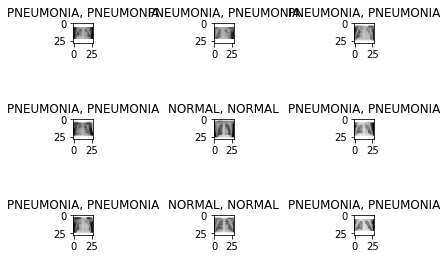

In [28]:
correct = np.where(predicted_classes==test_Y)[0]
print("Encontradas %d predicciones correctas" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(NEUMONIA[predicted_classes[correct]],
                                                    NEUMONIA[test_Y[correct]]))

    plt.tight_layout()

#### Se muestra las precciones incorrectas

Encontradas 28 predicciones incorrectas


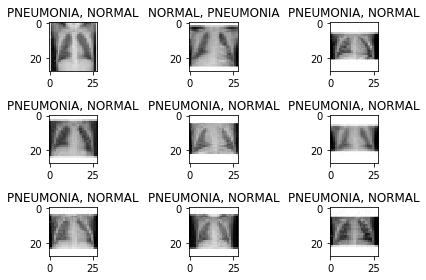

In [29]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Encontradas %d predicciones incorrectas" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(NEUMONIA[predicted_classes[incorrect]],
                                                    NEUMONIA[test_Y[incorrect]]))
    plt.tight_layout()

In [30]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.53      0.66        51
     Class 1       0.74      0.95      0.83        74

    accuracy                           0.78       125
   macro avg       0.81      0.74      0.75       125
weighted avg       0.80      0.78      0.76       125

